In [2]:
!pip install chess
import chess
import csv
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, Flatten, Input, Concatenate
import random
import keras
from keras.layers import Input
import pandas as pd
import numpy as np
import ast  # To safely evaluate strings containing Python literals
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy, MeanSquaredError
import random
from tensorflow.keras.models import load_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.7 MB/s eta 0:00:00


In [3]:
def board_to_input(board):
    # Define a mapping for pieces to integers
    piece_to_value = {
        (chess.PAWN, chess.WHITE): 1,
        (chess.KNIGHT, chess.WHITE): 2,
        (chess.BISHOP, chess.WHITE): 3,
        (chess.ROOK, chess.WHITE): 4,
        (chess.QUEEN, chess.WHITE): 5,
        (chess.KING, chess.WHITE): 6,
        (chess.PAWN, chess.BLACK): 7,
        (chess.KNIGHT, chess.BLACK): 8,
        (chess.BISHOP, chess.BLACK): 9,
        (chess.ROOK, chess.BLACK): 10,
        (chess.QUEEN, chess.BLACK): 11,
        (chess.KING, chess.BLACK): 12
    }

    # 8x8 grid with 14 channels: 12 for pieces, 1 for castling rights, 1 for side to move
    board_representation = np.zeros((8, 8, 17), dtype=int)

    # Fill the board representation with values for each piece
    for square in chess.SQUARES:
        rank = chess.square_rank(square)
        file = chess.square_file(square)
        piece = board.piece_at(square)
        if piece is not None:
            value = piece_to_value.get((piece.piece_type, piece.color))
            board_representation[rank, file, value - 1] = 1

    # Castling rights and side to move
    castling_rights_white_kingside = int(board.has_kingside_castling_rights(chess.WHITE))
    castling_rights_white_queenside = int(board.has_queenside_castling_rights(chess.WHITE))
    castling_rights_black_kingside = int(board.has_kingside_castling_rights(chess.BLACK))
    castling_rights_black_queenside = int(board.has_queenside_castling_rights(chess.BLACK))
    side_to_move = int(board.turn == chess.WHITE)

    # Add castling rights and side to move to the last two channels uniformly
    board_representation[:, :, 12] = castling_rights_white_kingside
    board_representation[:, :, 13] = castling_rights_white_queenside
    board_representation[:, :, 14] = castling_rights_black_kingside
    board_representation[:, :, 15] = castling_rights_black_queenside
    board_representation[:, :, 16] = side_to_move

    return board_representation

In [7]:
# Load the model
model = load_model('chess_model.h5')

def model_evaluator(num_games, model=model):
    for game in range(num_games):
        board = chess.Board()
        while not board.is_game_over():
            legal_moves = list(board.legal_moves)
            value_scores = []
            for move in legal_moves:
                board_copy = board.copy(stack=False)  # stack=False is more efficient
                board_copy.push(move)
                board_input = board_to_input(board_copy)  # Ensure this function is defined
                _, value = model.predict(board_input[np.newaxis, :], verbose=0)
                value_scores.append(value[0, 0])  # Adjust indexing based on your model's output

            if board.turn == chess.WHITE:
                highest_value_index = np.argmax(value_scores)
                best_move = legal_moves[highest_value_index]
                best_move_value = value_scores[highest_value_index]
                print(f"Evaluation: {best_move_value}")

            else:
                best_move = random.choice(legal_moves)

            board.push(best_move)
            display(board)

Evaluation: 1.4496356318029896e-13


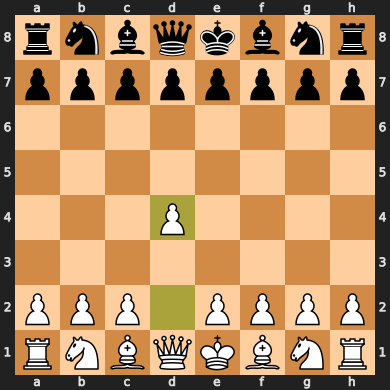

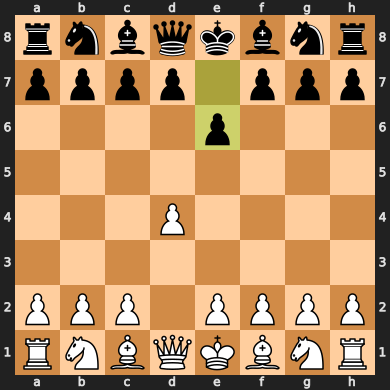

Evaluation: 2.117907845627931e-12


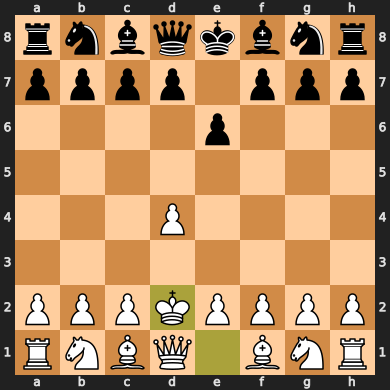

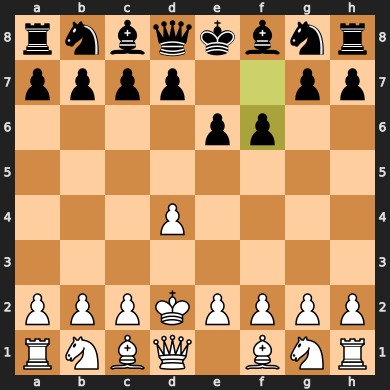

Evaluation: 2.3589595988388057e-12


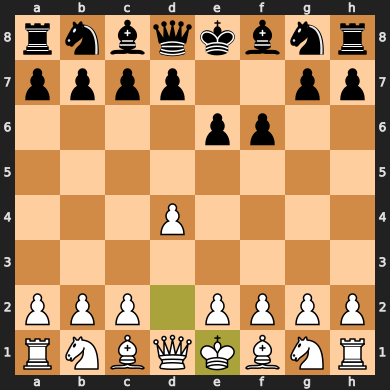

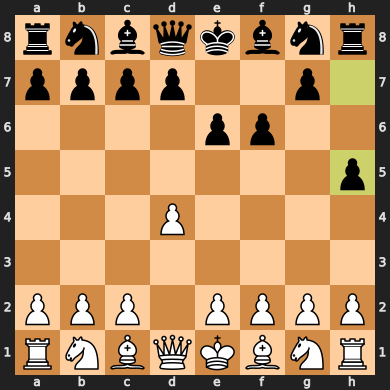

Evaluation: 2.4403673526407488e-12


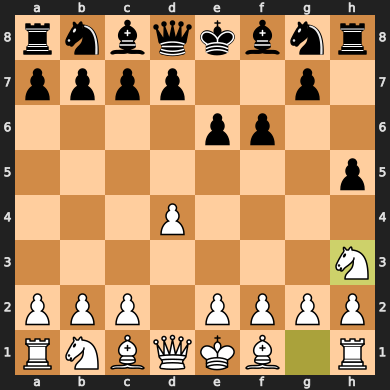

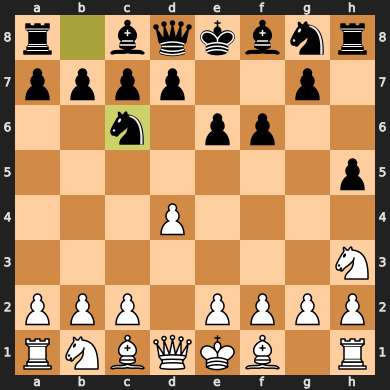

Evaluation: 2.3035364848239537e-12


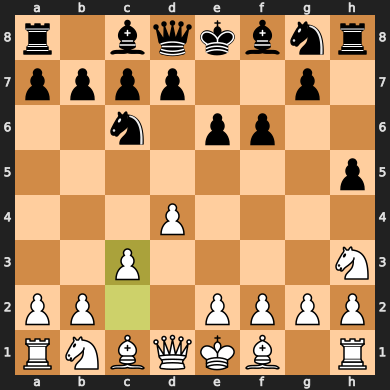

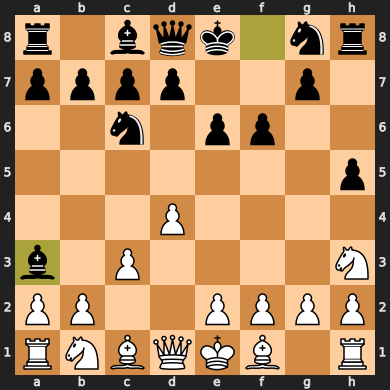

Evaluation: 3.4405507956525305e-12


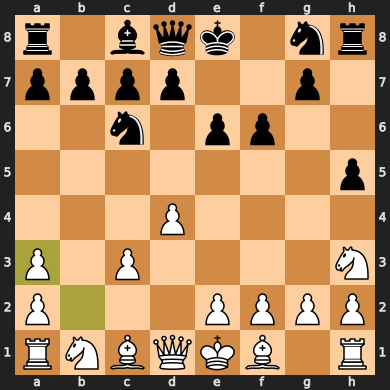

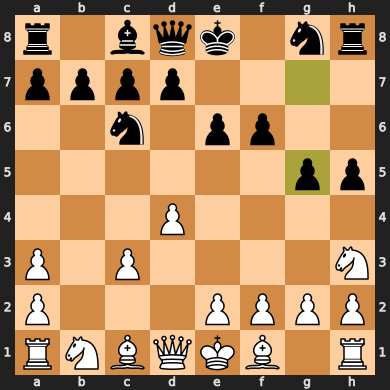

Evaluation: 4.261530798382873e-12


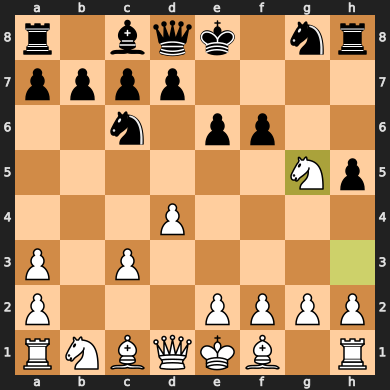

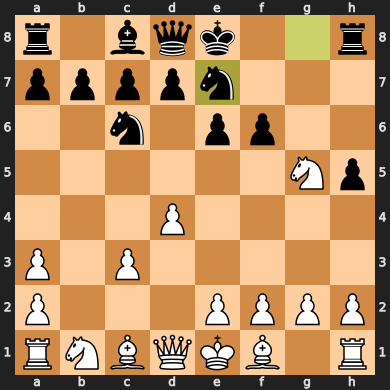

Evaluation: 6.494217490160548e-12


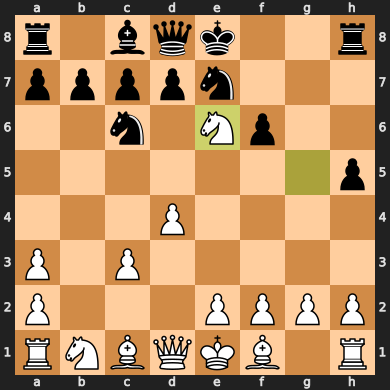

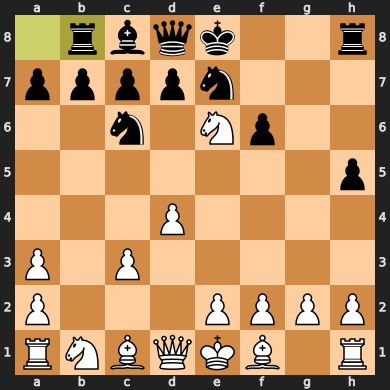

Evaluation: 5.2600531569302333e-11


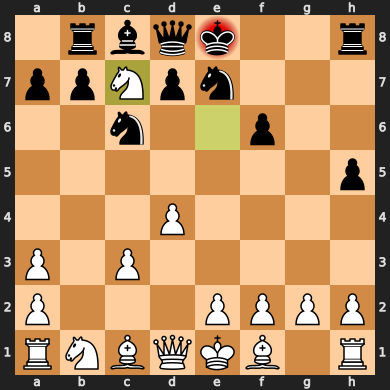

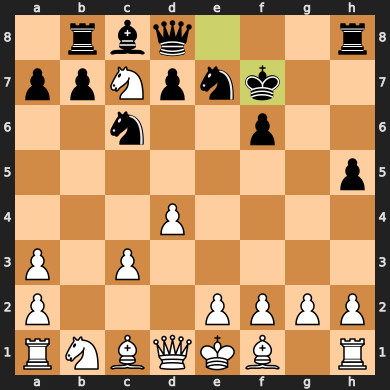

Evaluation: 2.026055234694013e-08


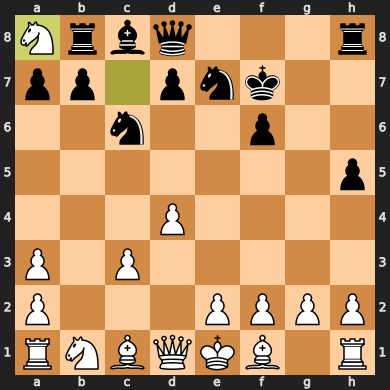

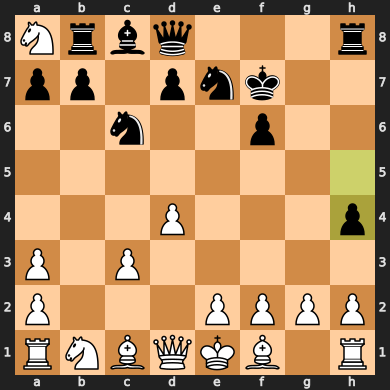

Evaluation: 2.3466370180358354e-08


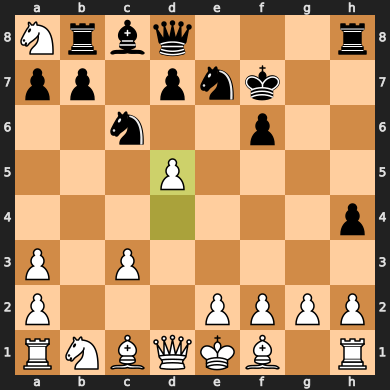

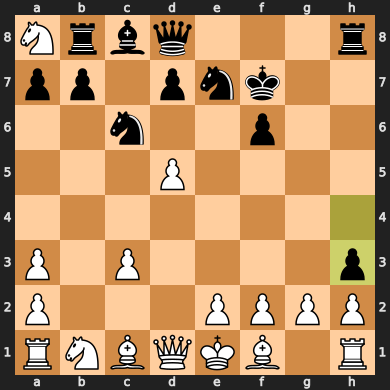

Evaluation: 4.191527125385619e-08


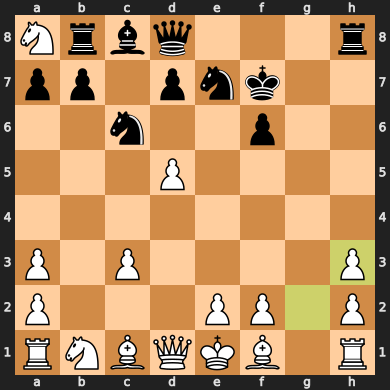

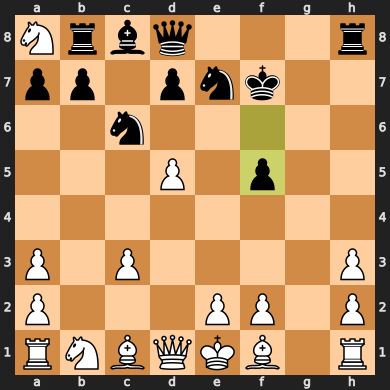

Evaluation: 5.962123594827062e-08


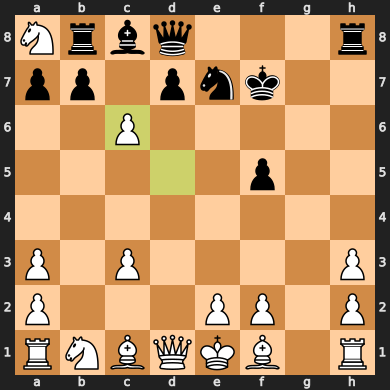

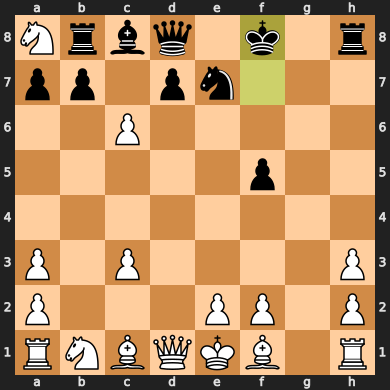

Evaluation: 1.2955274542036932e-07


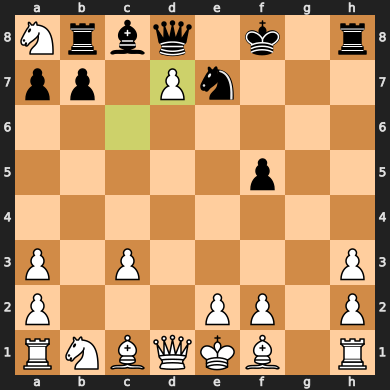

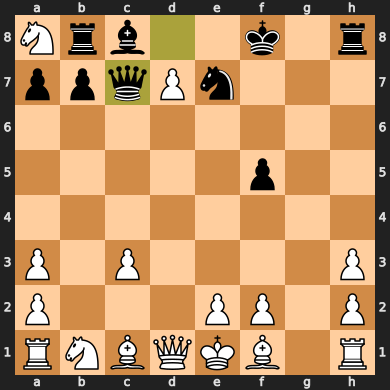

Evaluation: 3.7934273677819874e-07


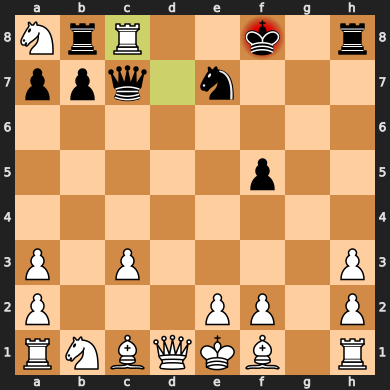

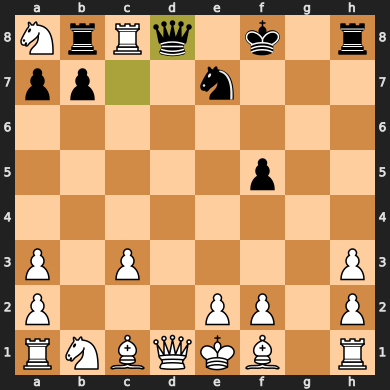

Evaluation: 3.840658564513433e-07


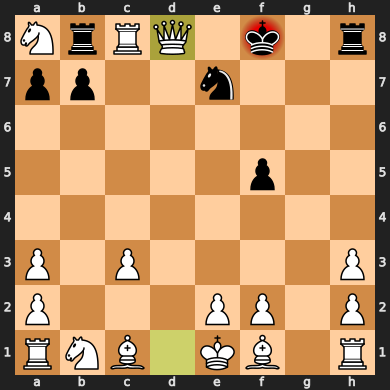

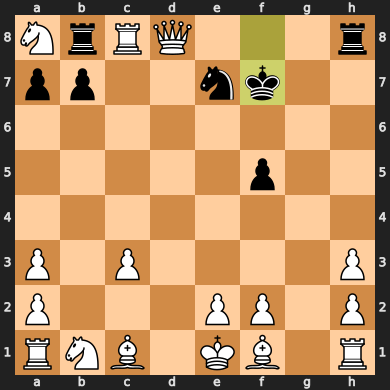

Evaluation: 3.9372417859340203e-07


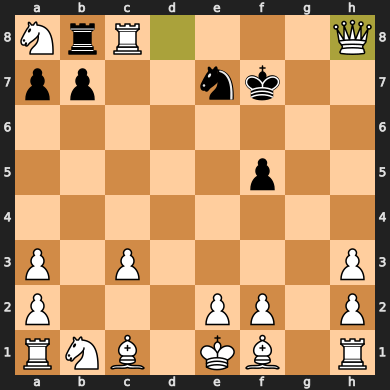

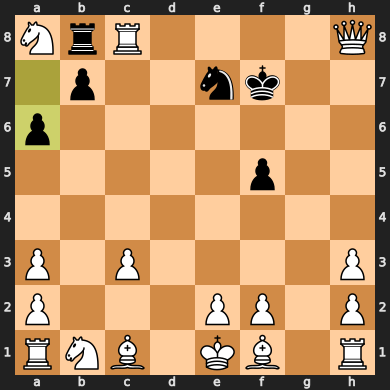

Evaluation: 4.132081130592269e-07


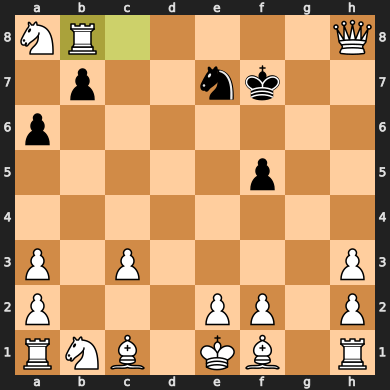

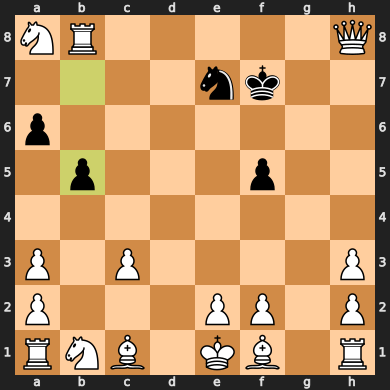

Evaluation: 4.880933488493611e-07


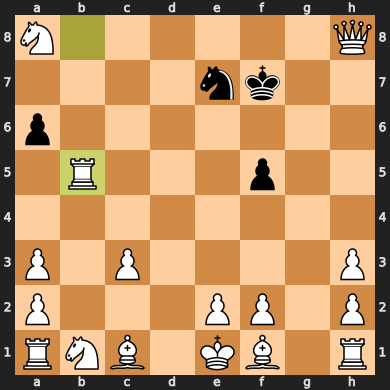

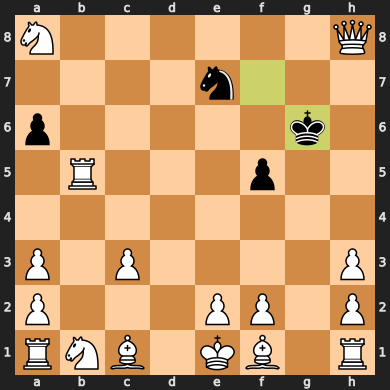

Evaluation: 7.389327834061987e-07


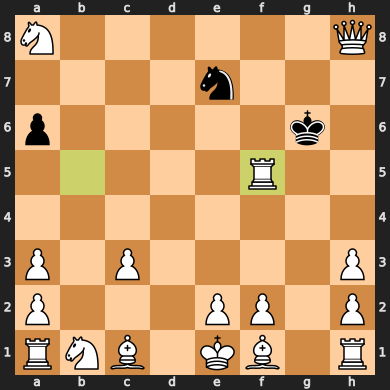

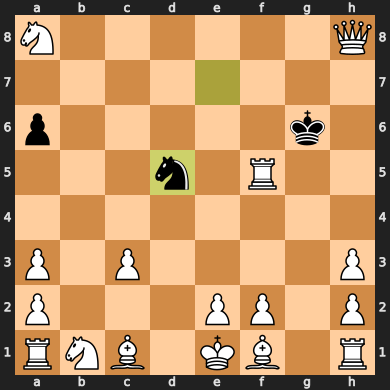

Evaluation: 1.2864467180406791e-06


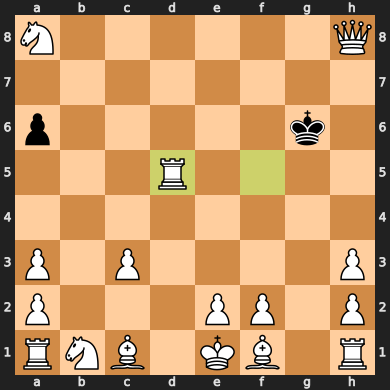

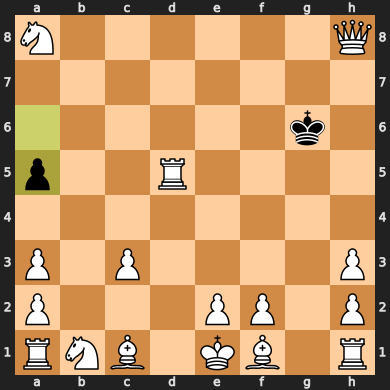

Evaluation: 2.186200390497106e-06


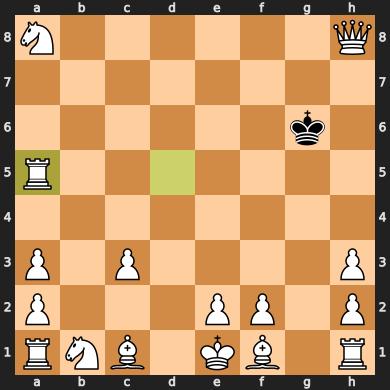

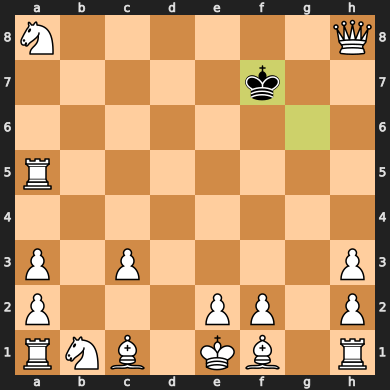

Evaluation: 2.6130894639209146e-06


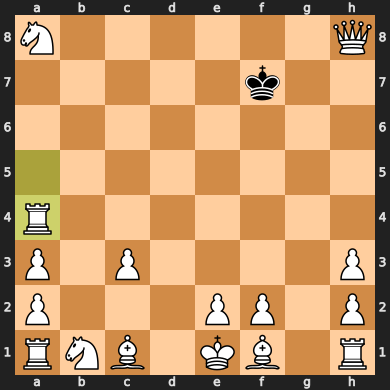

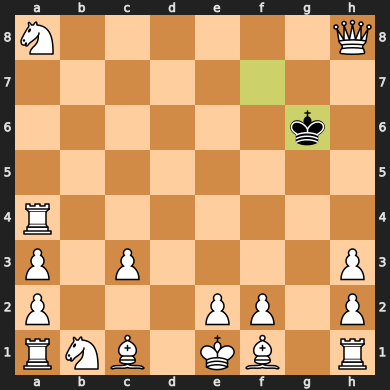

Evaluation: 2.683742195586092e-06


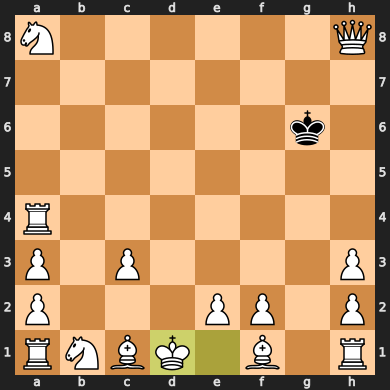

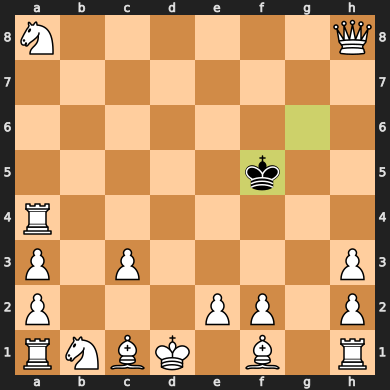

Evaluation: 2.532492771933903e-06


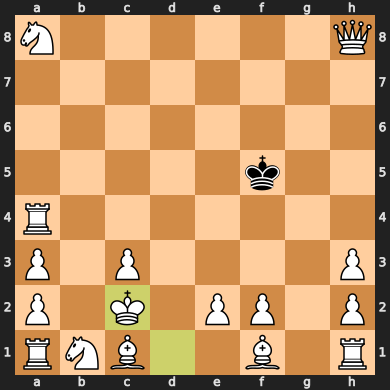

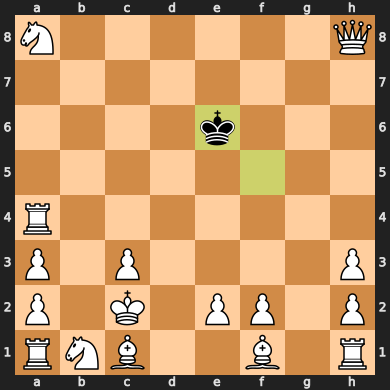

Evaluation: 2.604980409159907e-06


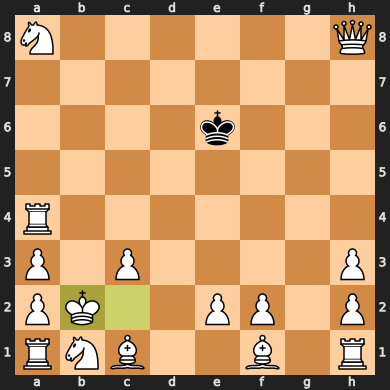

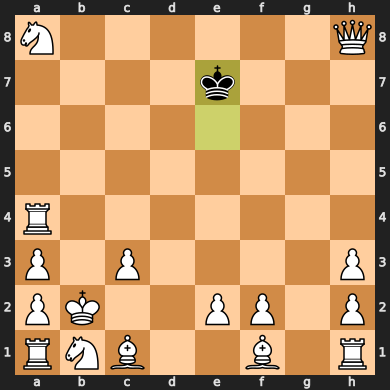

Evaluation: 2.9020325200690422e-06


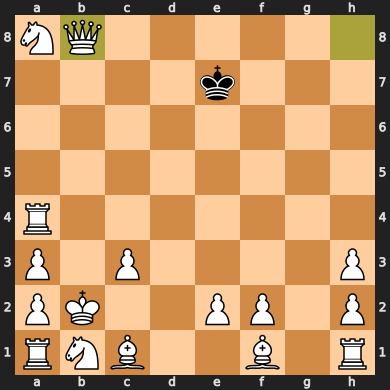

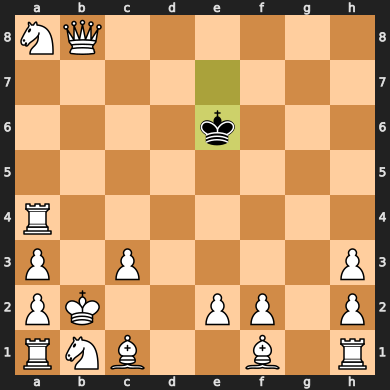

Evaluation: 2.604980409159907e-06


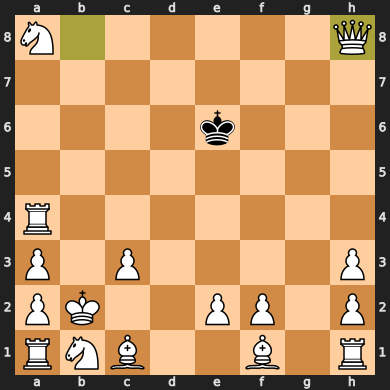

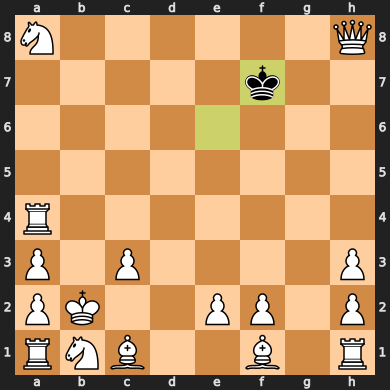

Evaluation: 2.8979395665373886e-06


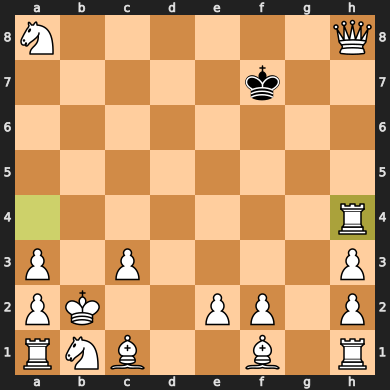

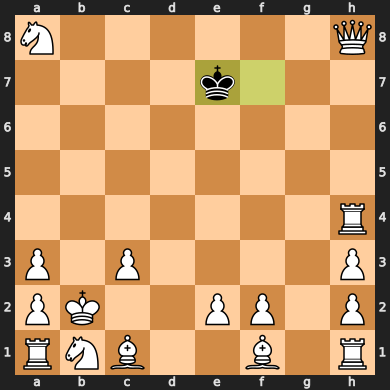

Evaluation: 3.093521854680148e-06


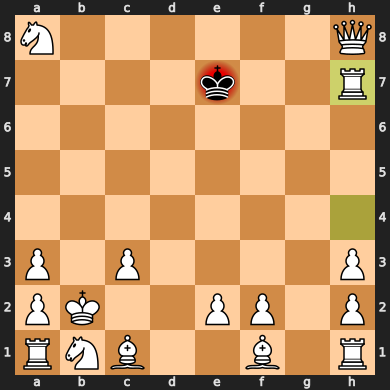

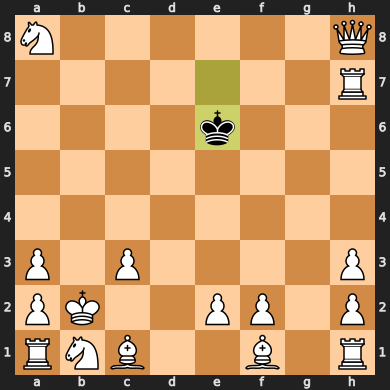

Evaluation: 2.6831894501810893e-06


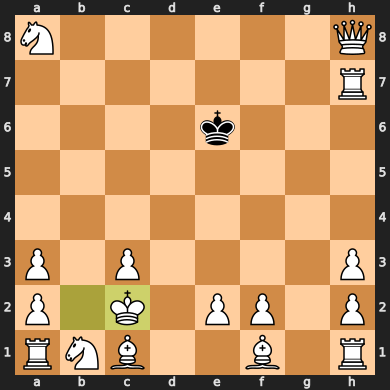

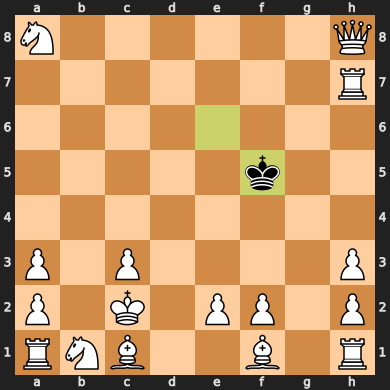

Evaluation: 2.8230469979462214e-06


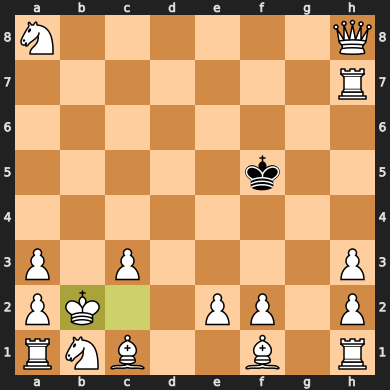

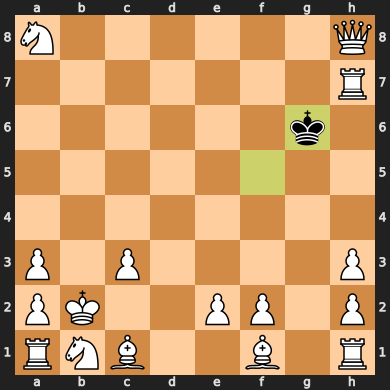

Evaluation: 3.009999318237533e-06


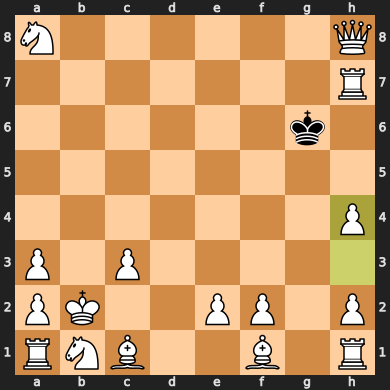

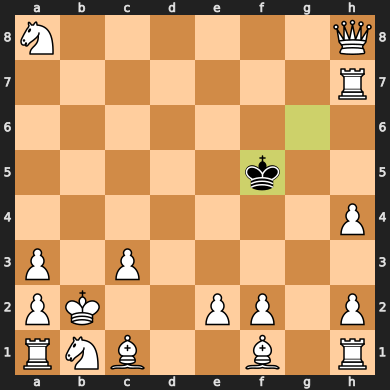

Evaluation: 2.6702166451286757e-06


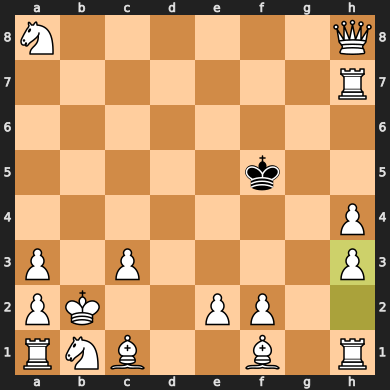

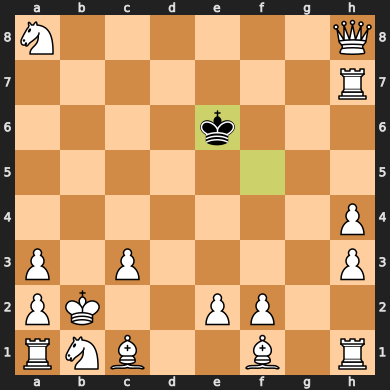

Evaluation: 2.6108998554263962e-06


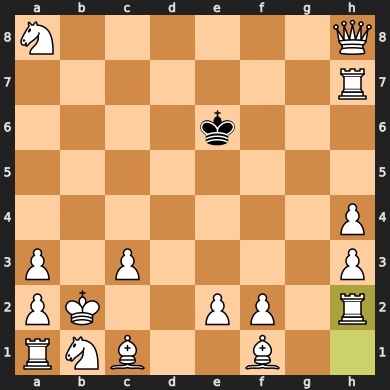

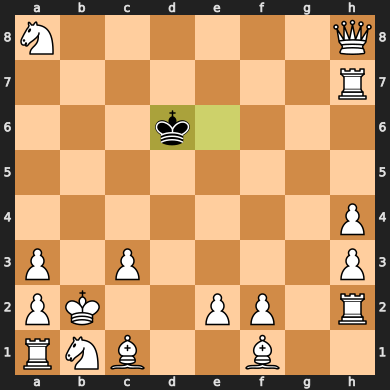

Evaluation: 2.8792978810088243e-06


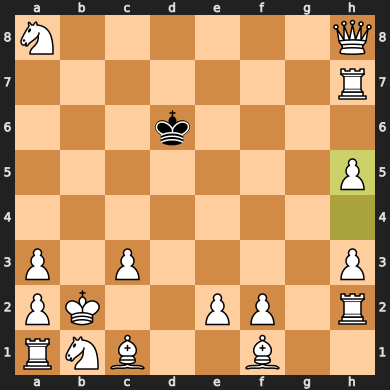

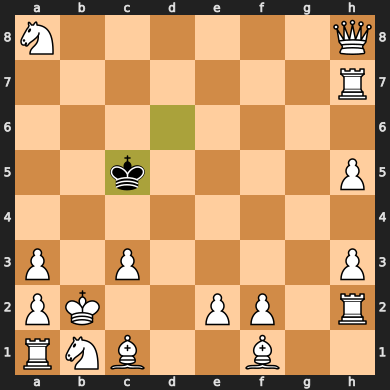

Evaluation: 3.276461939094588e-06


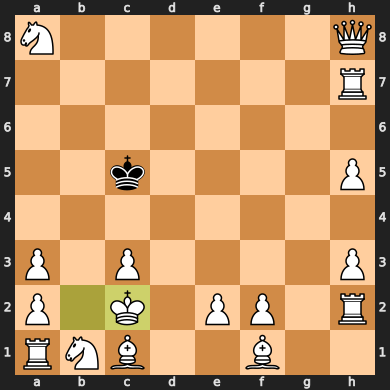

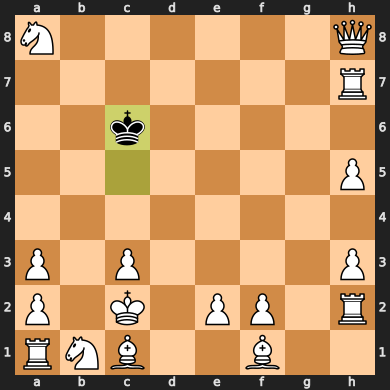

Evaluation: 2.959636503874208e-06


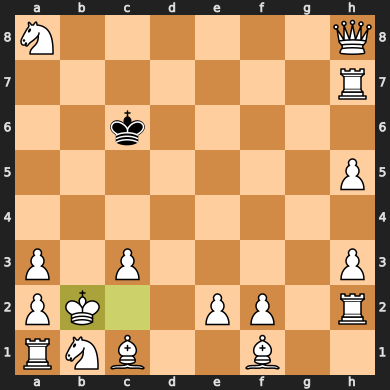

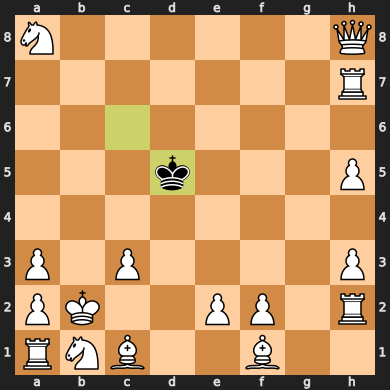

Evaluation: 2.7940347990806913e-06


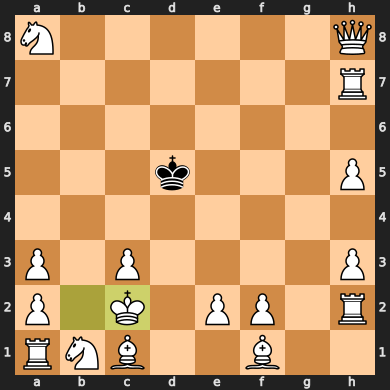

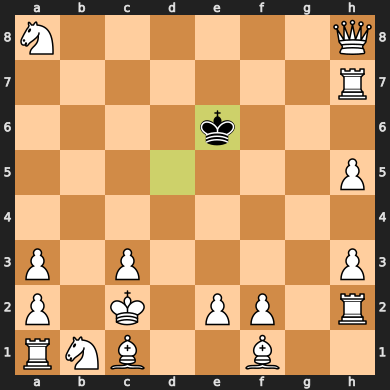

Evaluation: 2.5857634682324715e-06


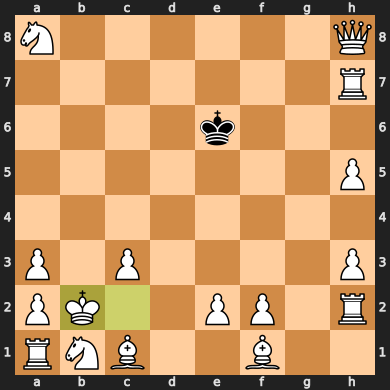

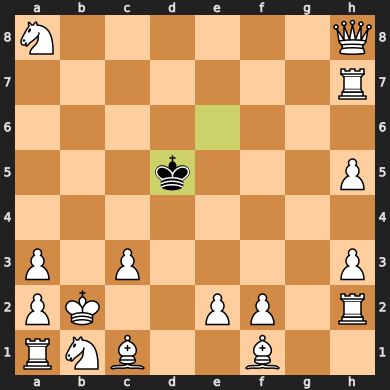

Evaluation: 2.7940347990806913e-06


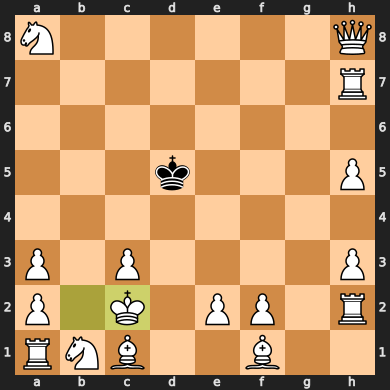

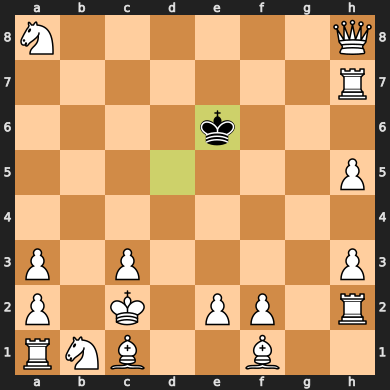

Evaluation: 2.5857634682324715e-06


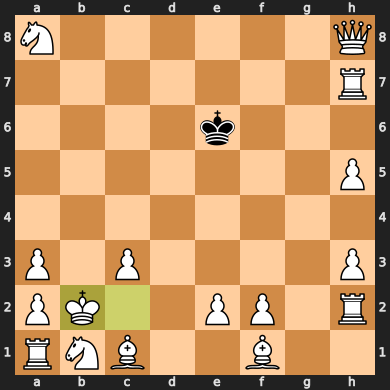

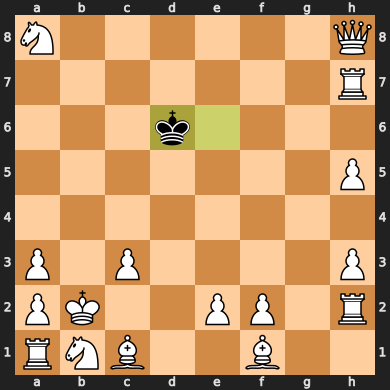

Evaluation: 2.80310882772028e-06


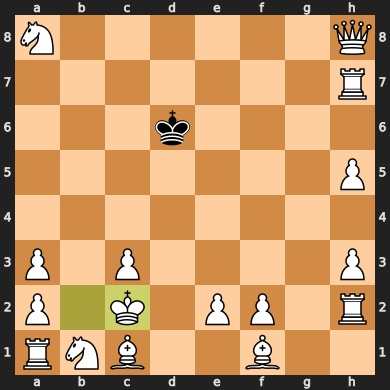

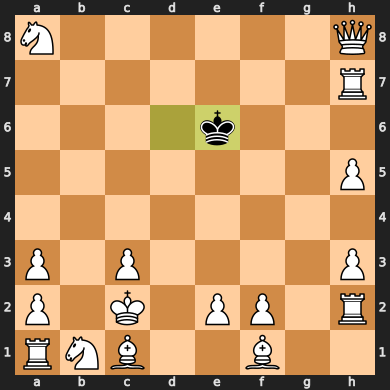

Evaluation: 2.5857634682324715e-06


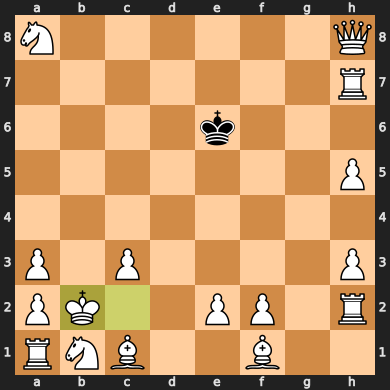

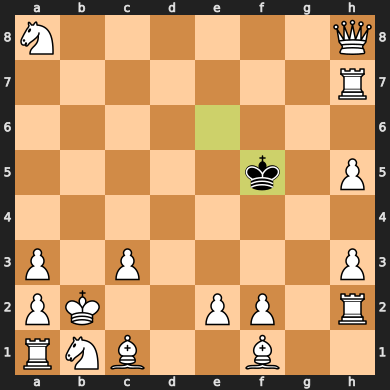

Evaluation: 2.621148723847e-06


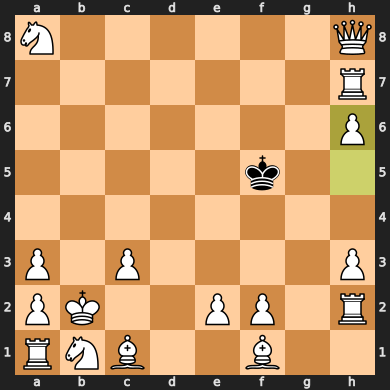

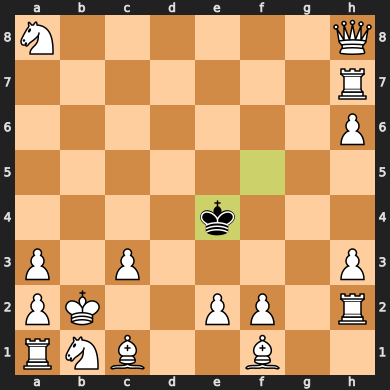

Evaluation: 3.011782609974034e-06


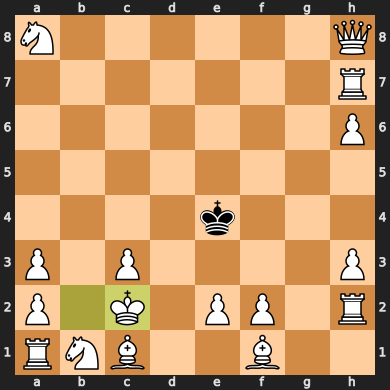

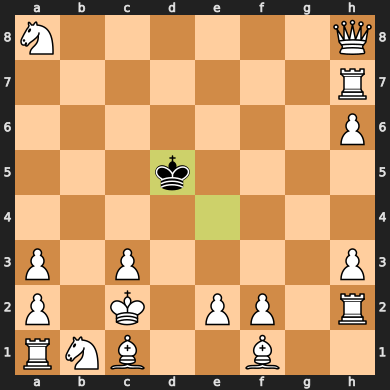

Evaluation: 2.771736490103649e-06


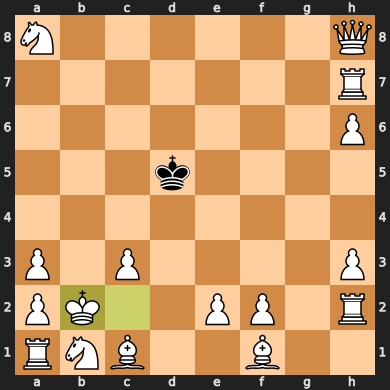

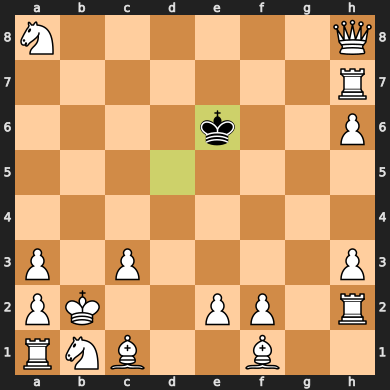

Evaluation: 2.435825535940239e-06


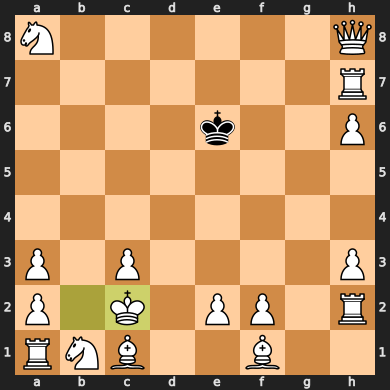

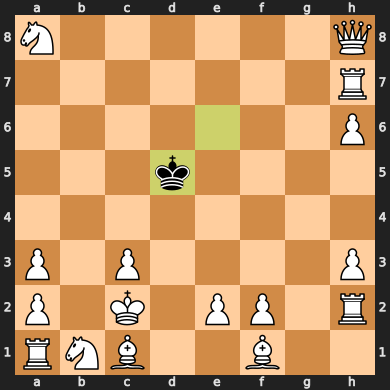

KeyboardInterrupt: 

In [8]:
model_evaluator(1)

Evaluation: 1.4496356318029896e-13


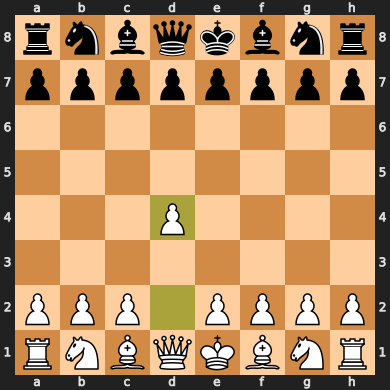

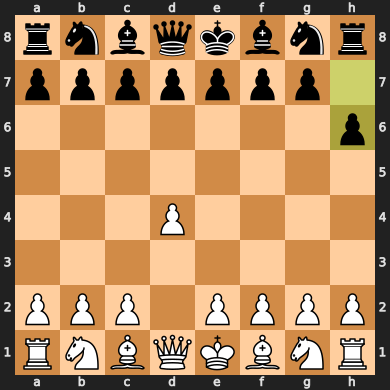

Evaluation: 2.117653491798266e-12


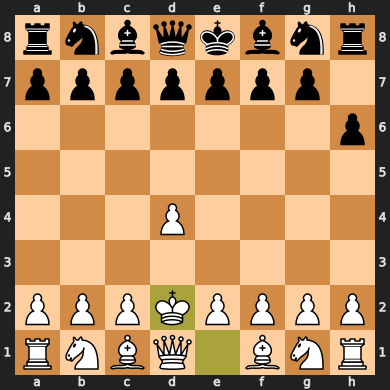

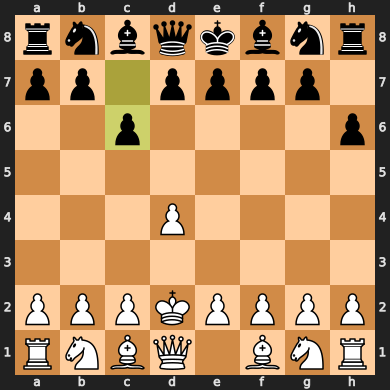

Evaluation: 2.7386966392622947e-12


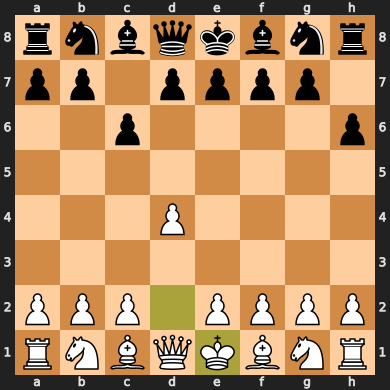

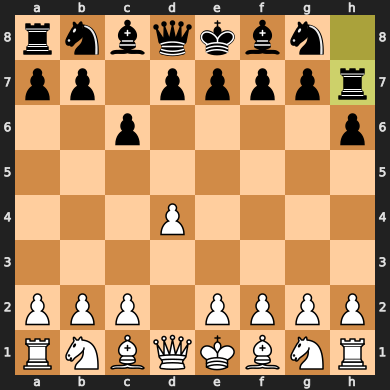

Evaluation: 3.658099517744873e-11


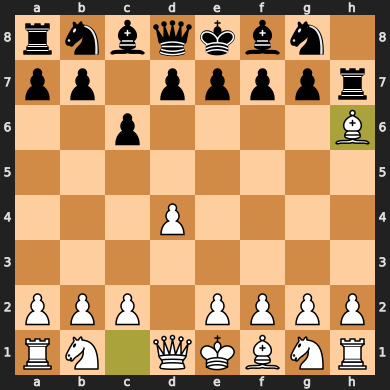

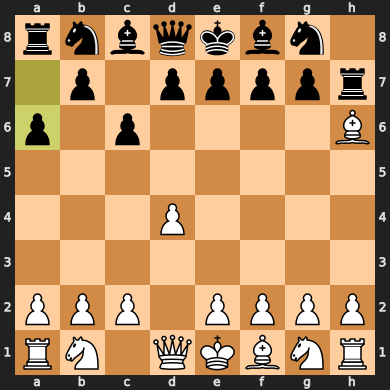

Evaluation: 4.537988040898e-11


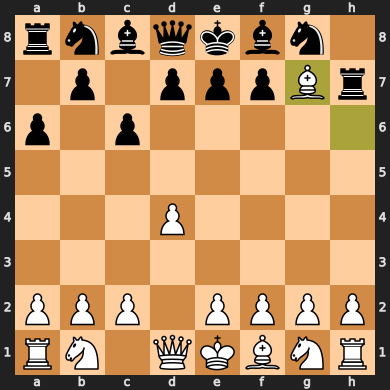

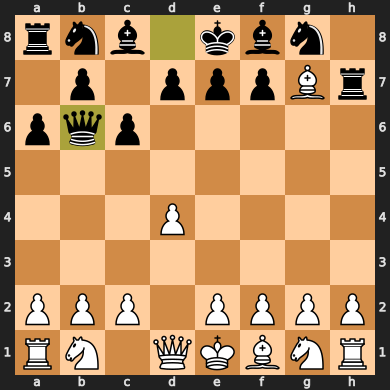

Evaluation: 9.82414913308638e-11


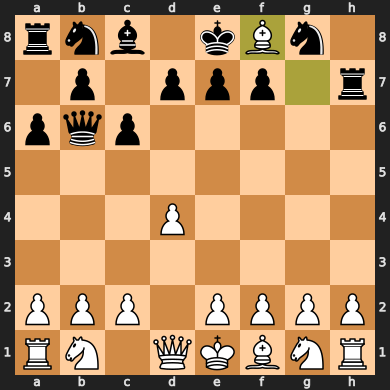

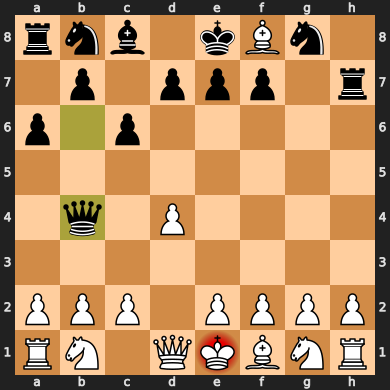

Evaluation: 7.87272469437994e-11


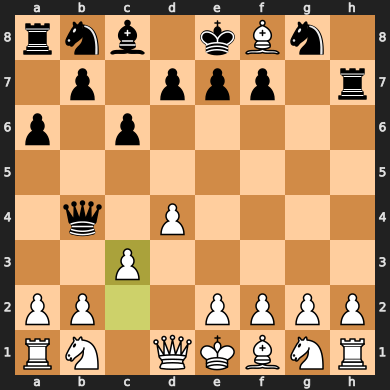

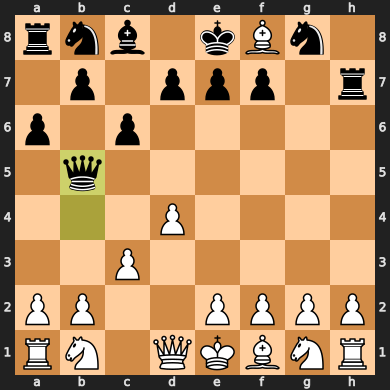

Evaluation: 9.628309954878844e-11


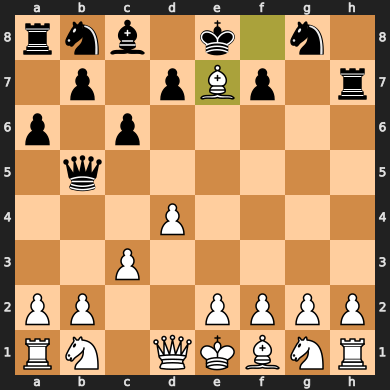

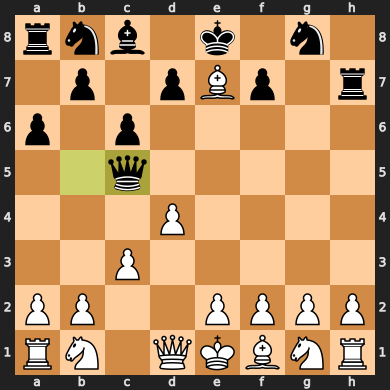

Evaluation: 1.0895497698504286e-10


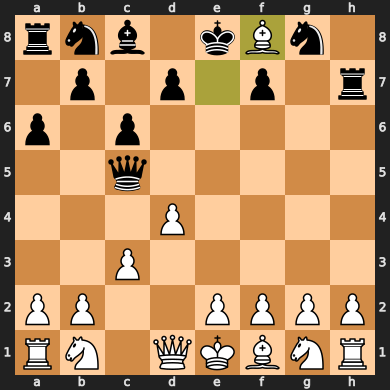

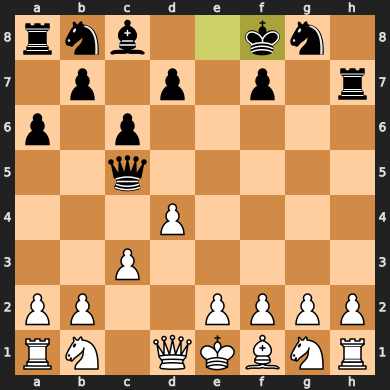

Evaluation: 5.407886405350837e-08


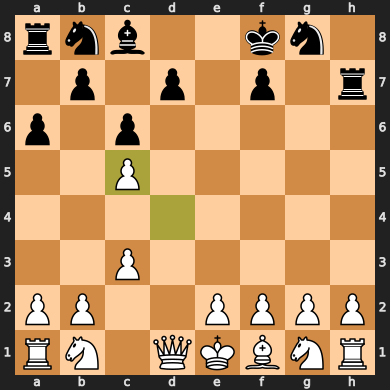

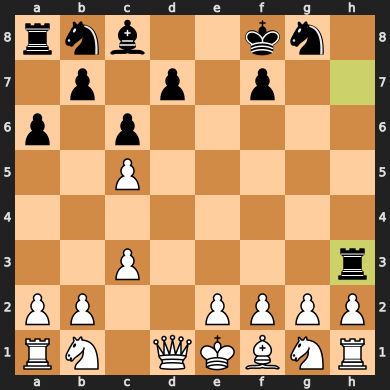

Evaluation: 6.659493578808906e-08


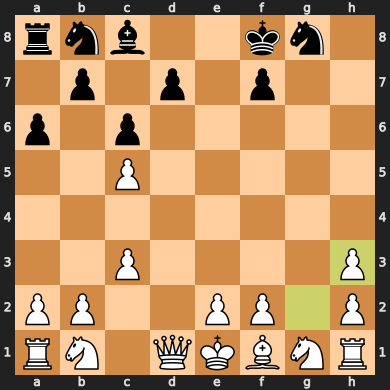

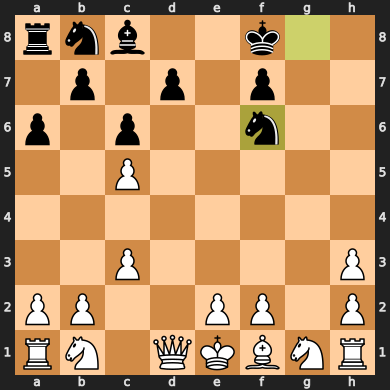

Evaluation: 6.513905503879869e-08


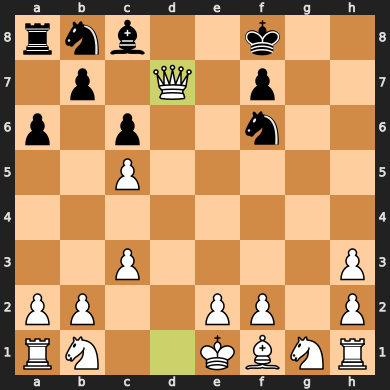

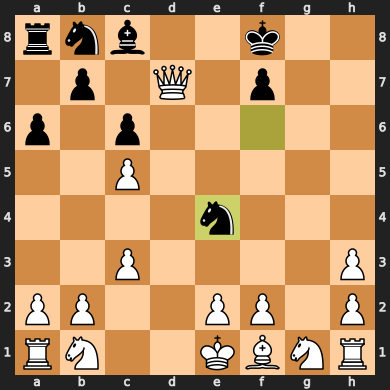

Evaluation: 1.0925604954081791e-07


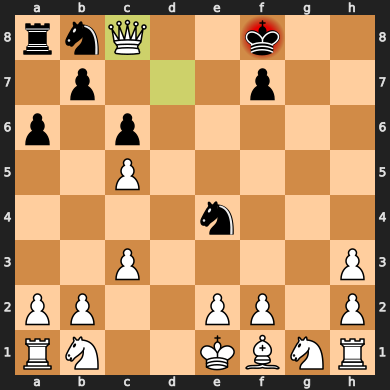

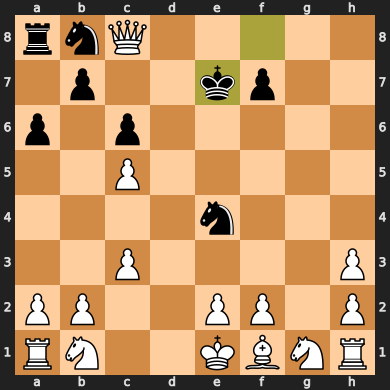

Evaluation: 1.2772923696502403e-07


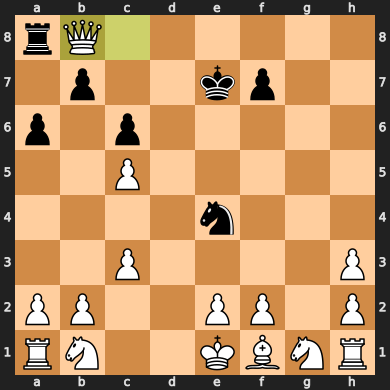

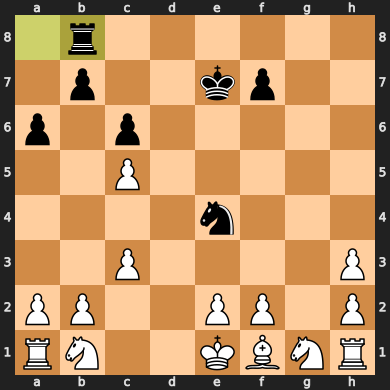

Evaluation: 1.577215584802616e-07


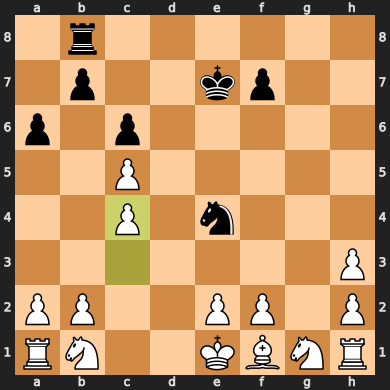

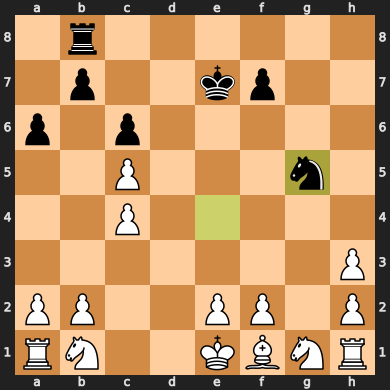

Evaluation: 1.4338336029595666e-07


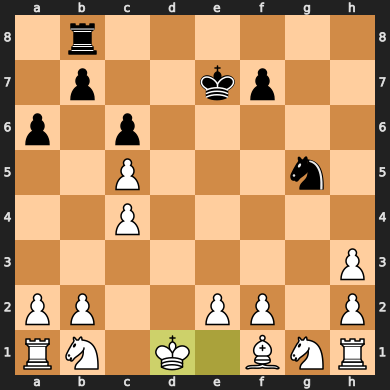

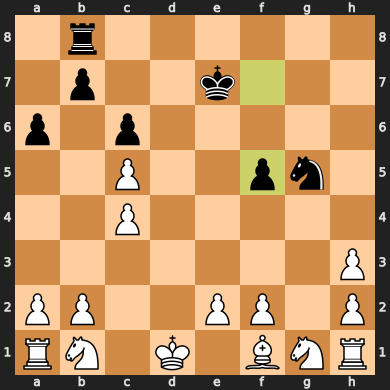

Evaluation: 1.5654804030873493e-07


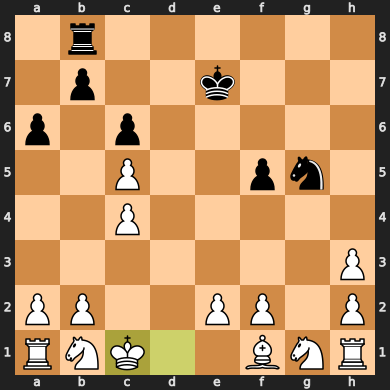

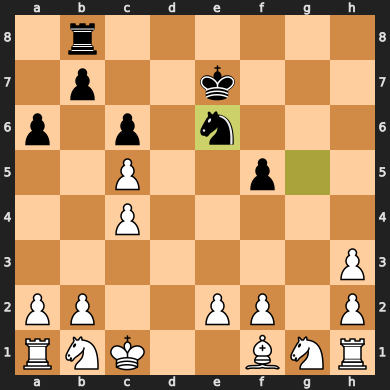

Evaluation: 1.5576664225136483e-07


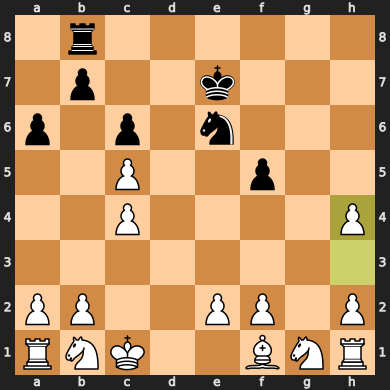

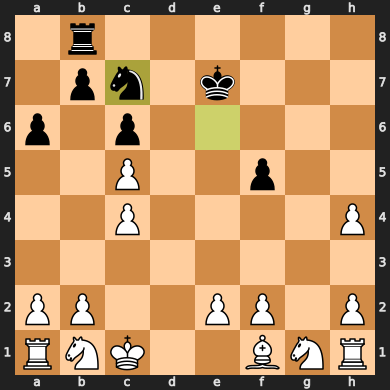

Evaluation: 1.86566083471007e-07


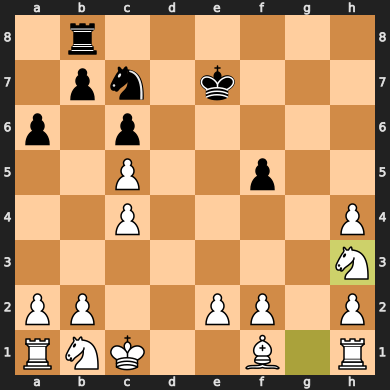

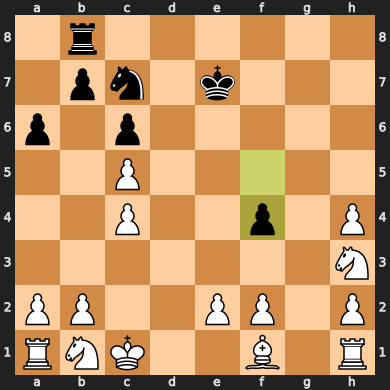

Evaluation: 2.1602636479656212e-07


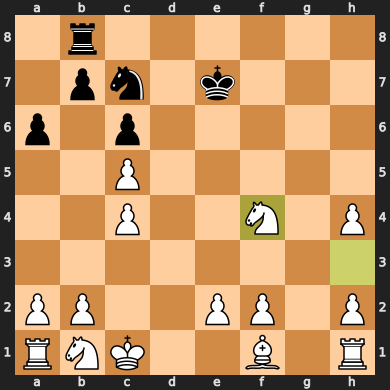

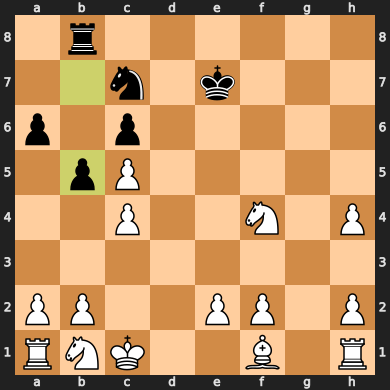

Evaluation: 3.944845161640842e-07


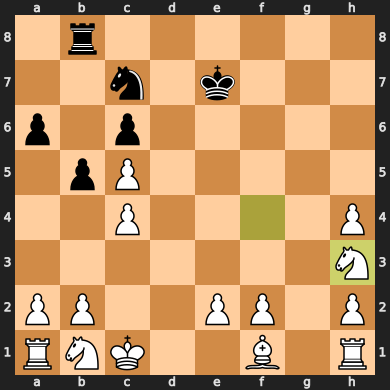

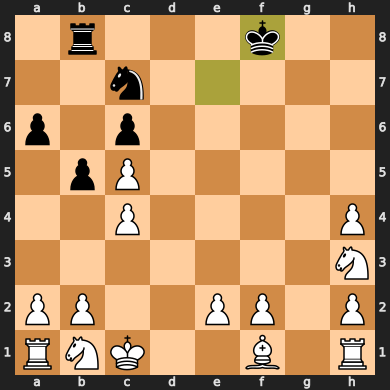

Evaluation: 6.851388434370165e-07


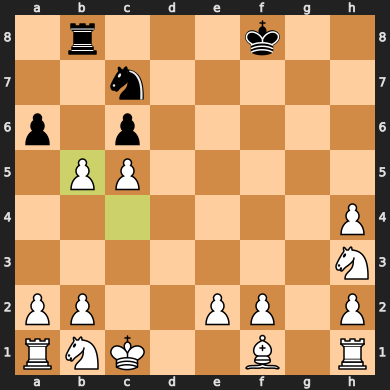

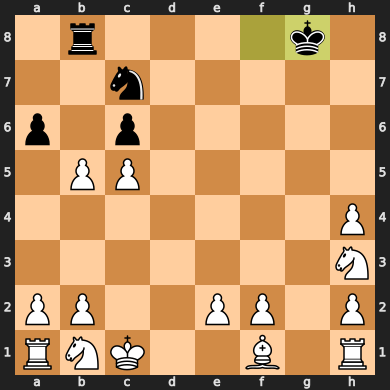

Evaluation: 1.1342075367792859e-06


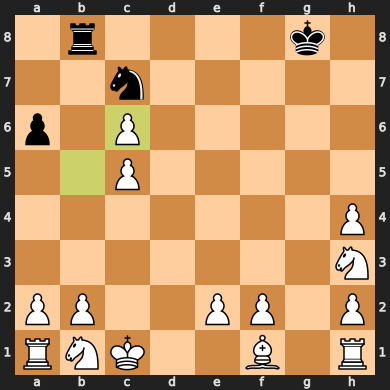

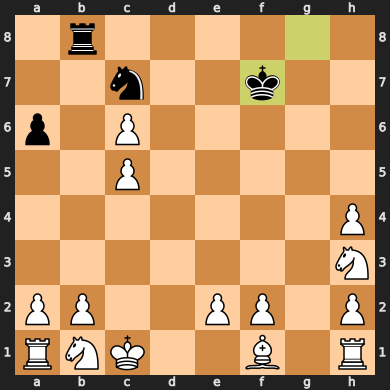

Evaluation: 7.593840791741968e-07


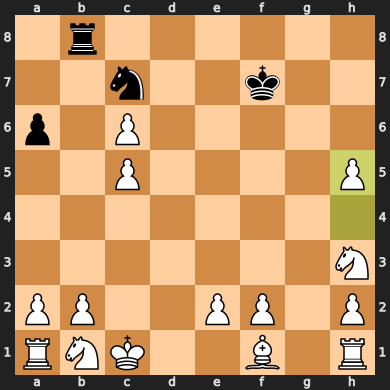

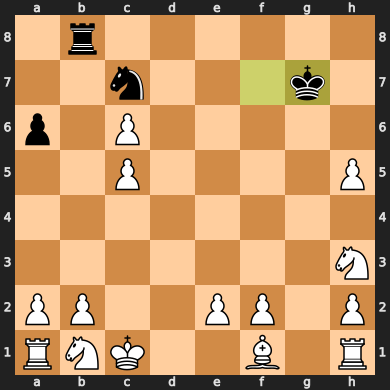

Evaluation: 8.835975222609704e-07


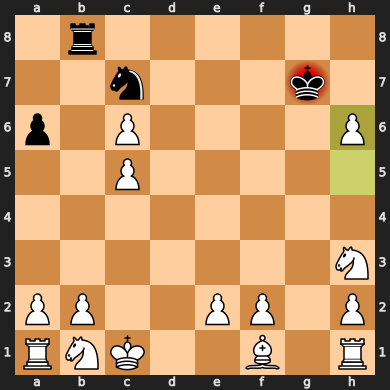

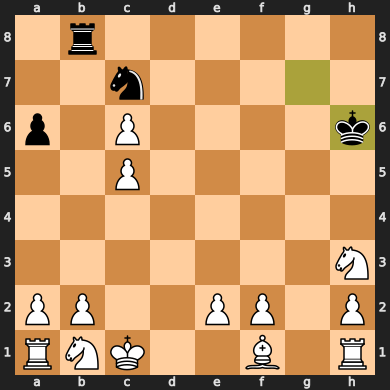

Evaluation: 1.641407379793236e-06


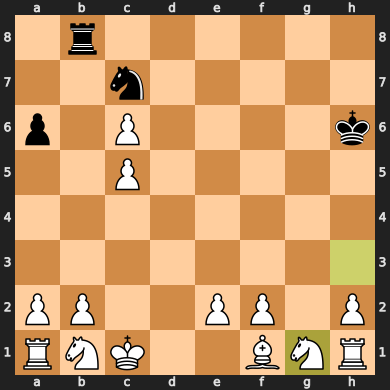

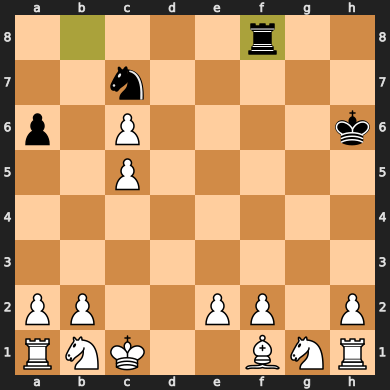

Evaluation: 1.3991251535117044e-06


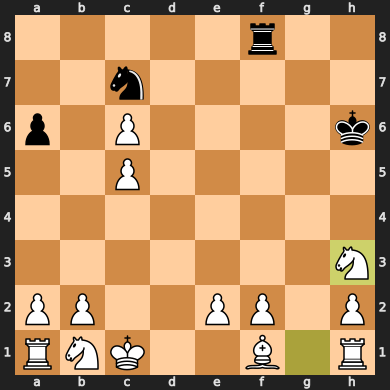

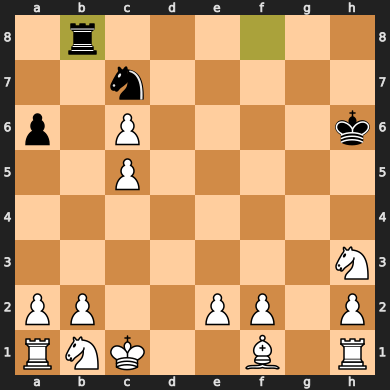

Evaluation: 1.641407379793236e-06


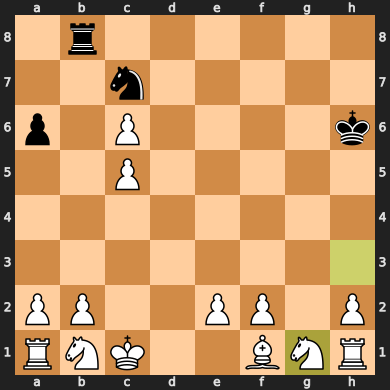

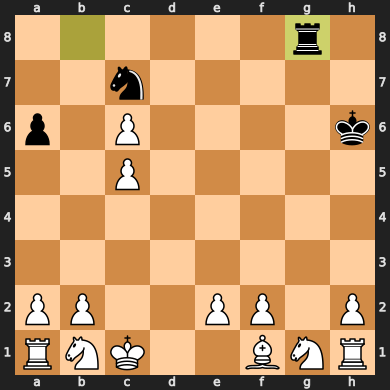

Evaluation: 1.5539452533630538e-06


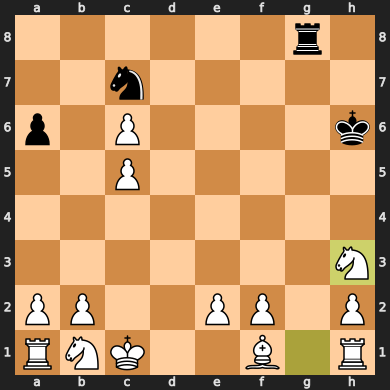

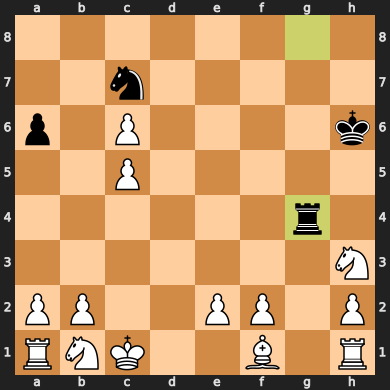

Evaluation: 1.3014644082431914e-06


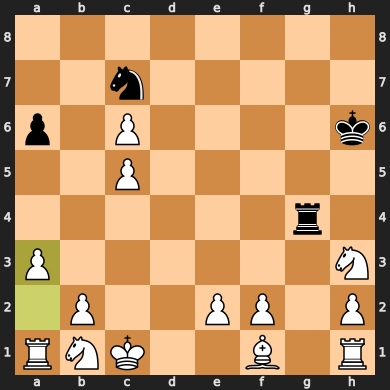

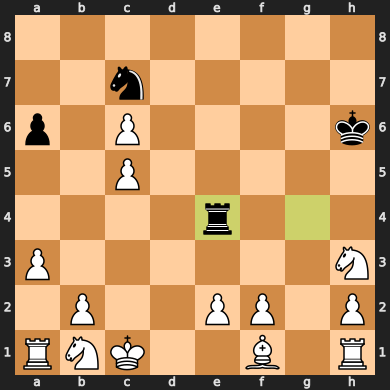

Evaluation: 1.1797109209510381e-06


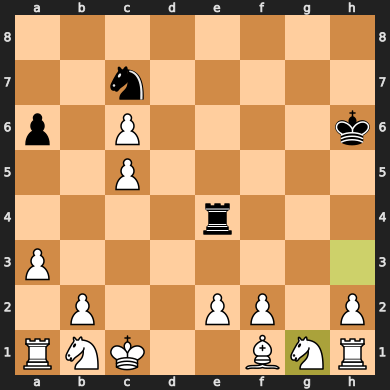

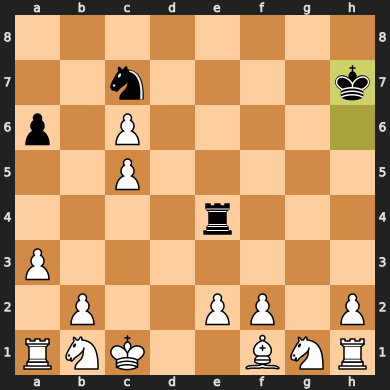

Evaluation: 1.2619207154784817e-06


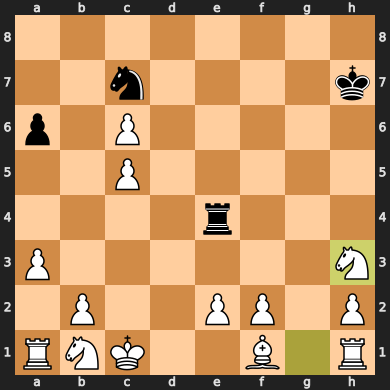

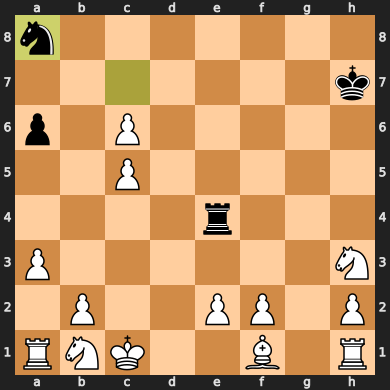

Evaluation: 1.8622118886924e-06


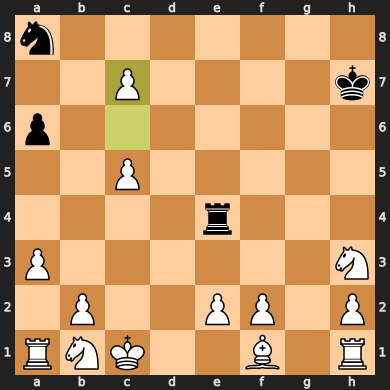

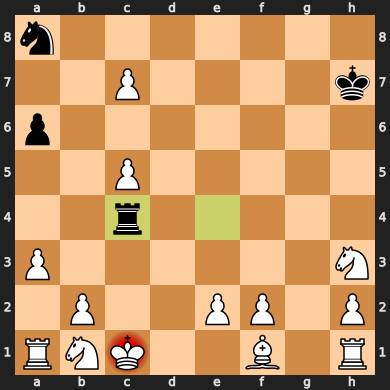

Evaluation: 2.0756292542500887e-06


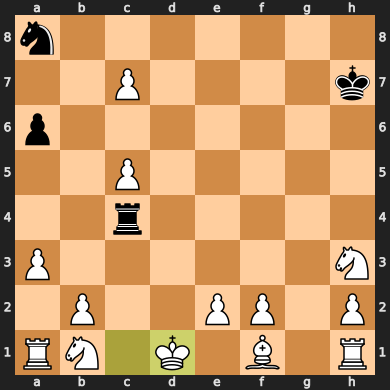

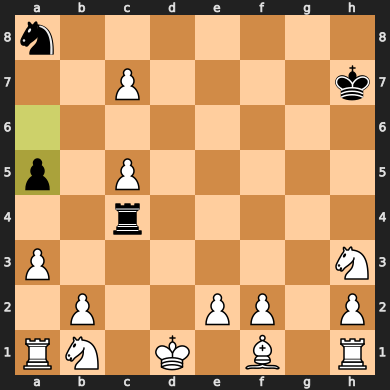

Evaluation: 3.487388994471985e-06


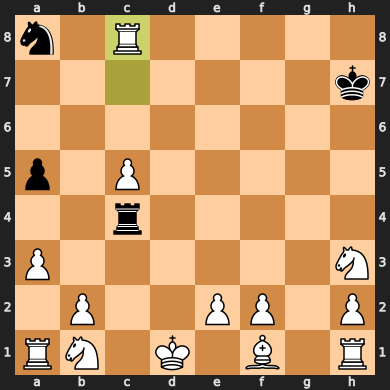

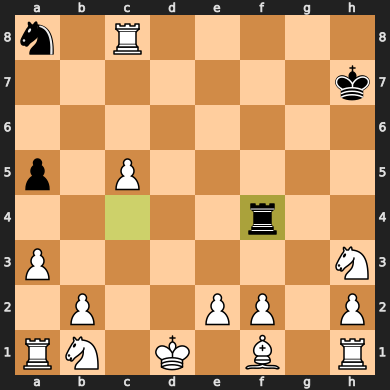

Evaluation: 3.1833303637540666e-06


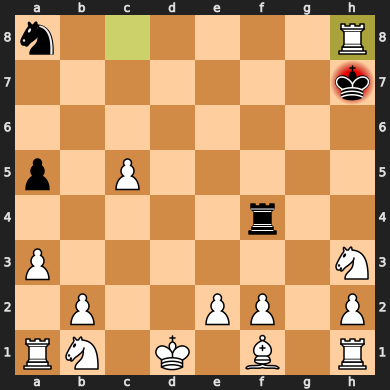

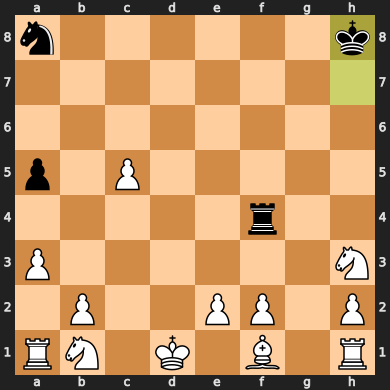

Evaluation: 3.858982836391078e-06


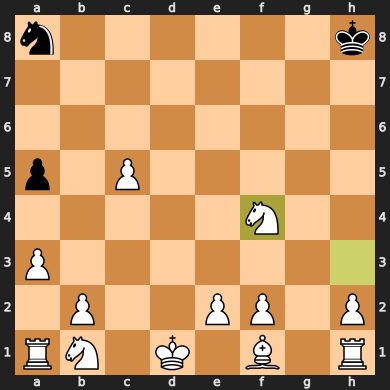

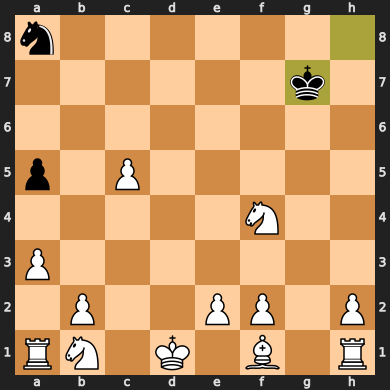

Evaluation: 4.407913365866989e-06


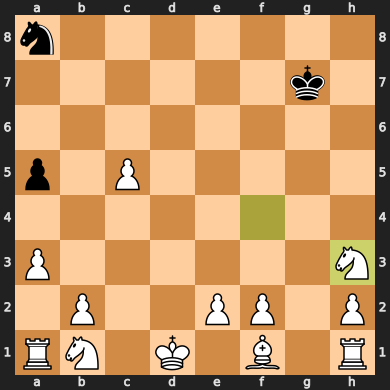

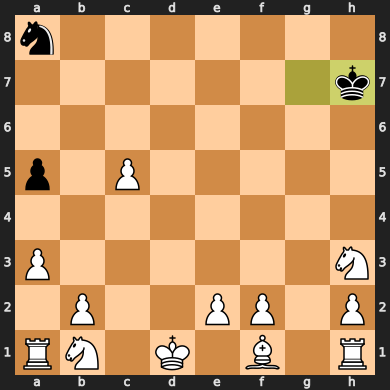

Evaluation: 6.426970230677398e-06


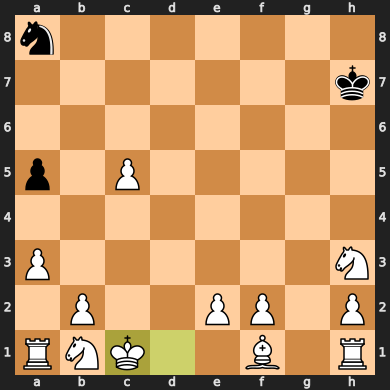

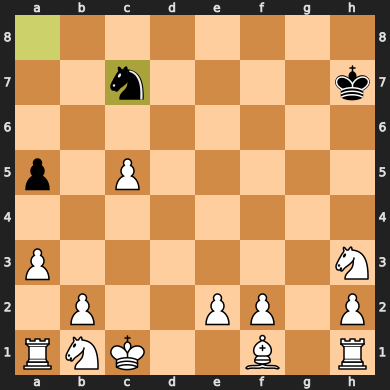

Evaluation: 4.609656571119558e-06


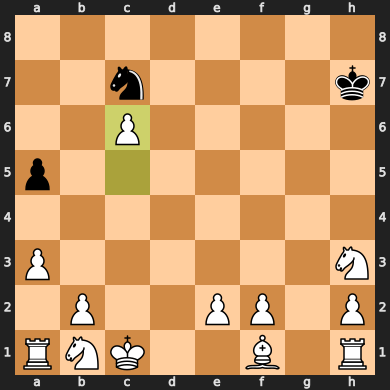

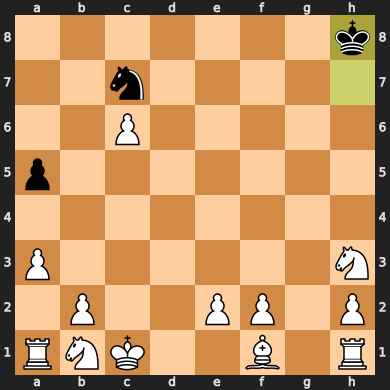

Evaluation: 5.432300895336084e-06


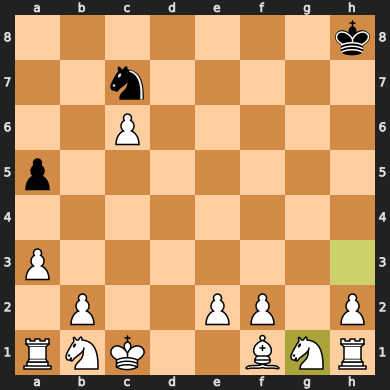

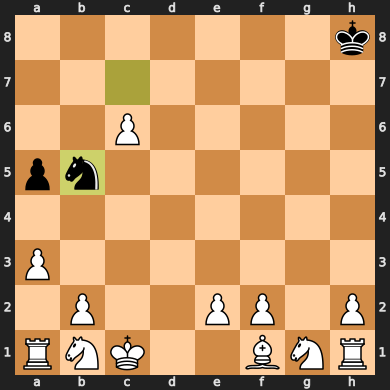

Evaluation: 7.329087566176895e-06


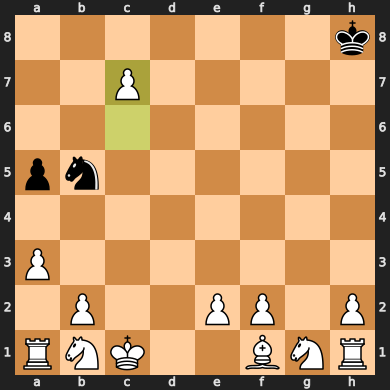

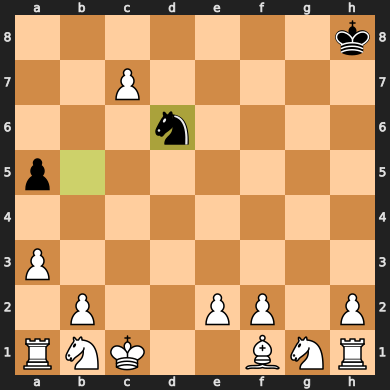

Evaluation: 9.89437921816716e-06


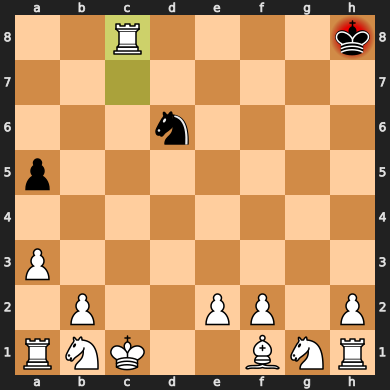

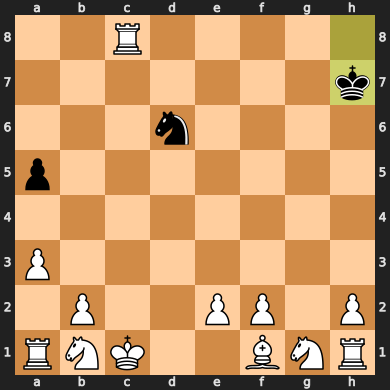

Evaluation: 9.975156899599824e-06


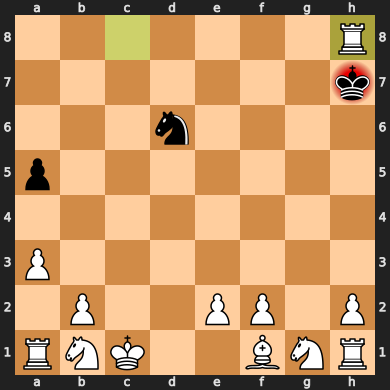

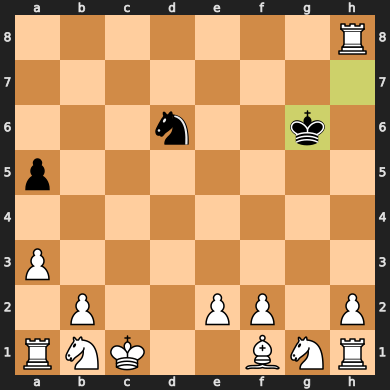

Evaluation: 6.128649147285614e-06


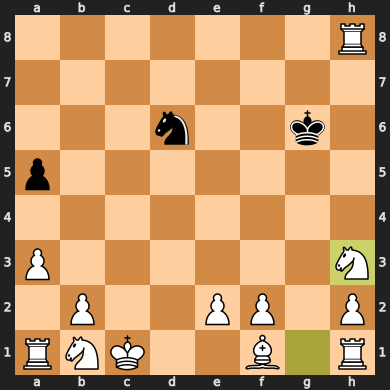

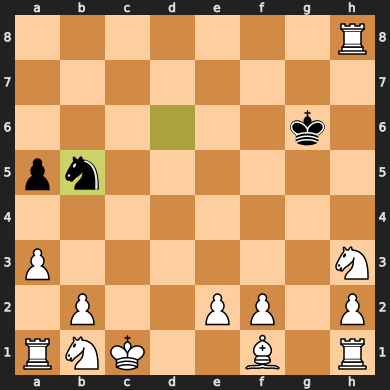

Evaluation: 8.556384273106232e-06


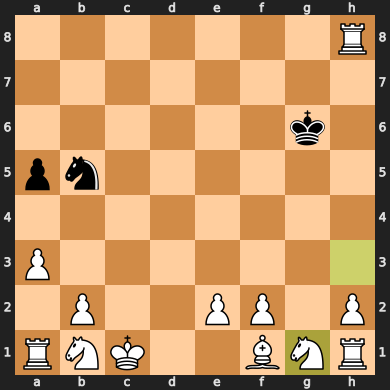

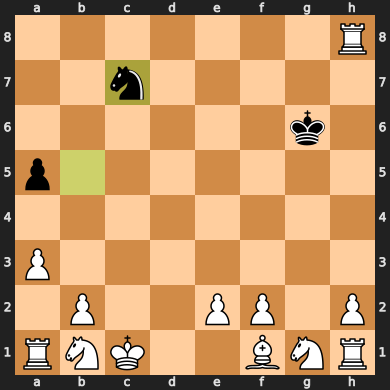

Evaluation: 6.820436283305753e-06


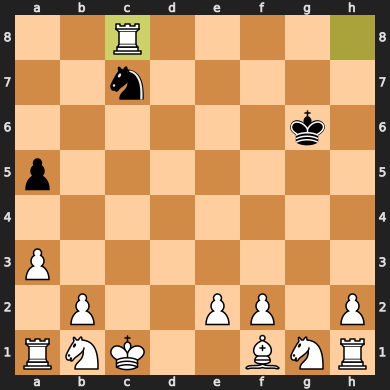

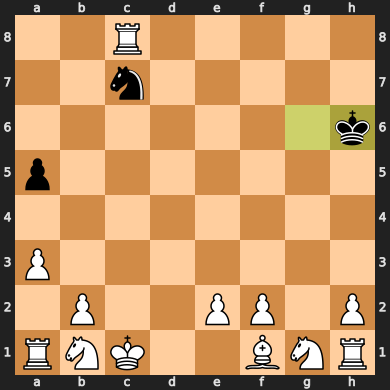

Evaluation: 1.1321767487970646e-05


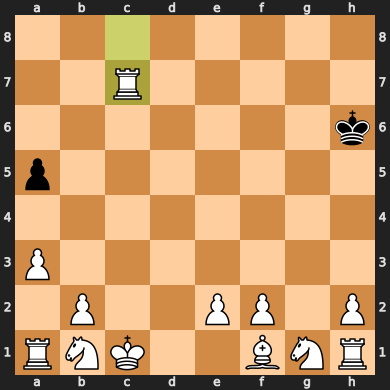

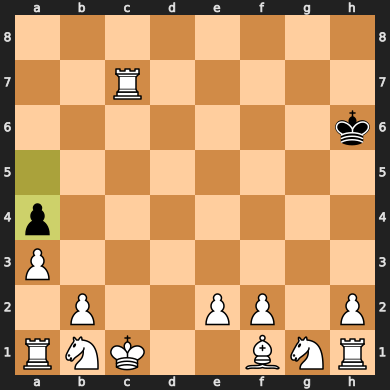

Evaluation: 1.857848110375926e-05


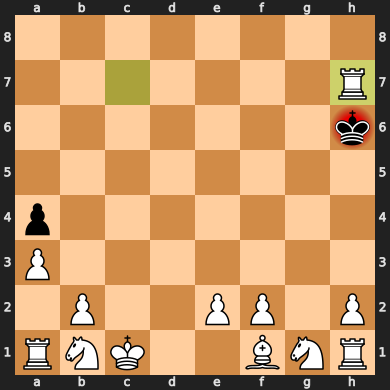

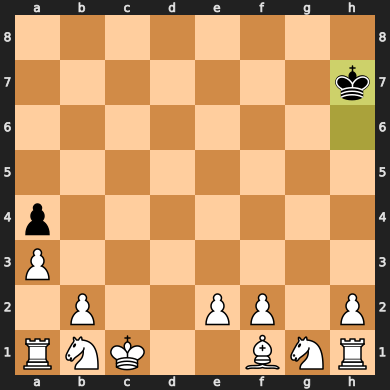

Evaluation: 2.1086565539008006e-05


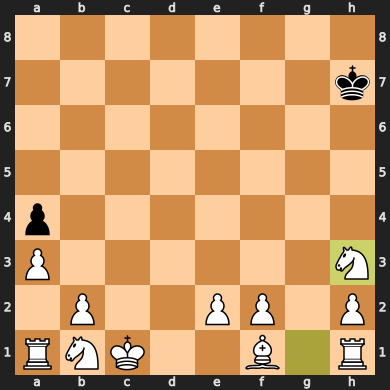

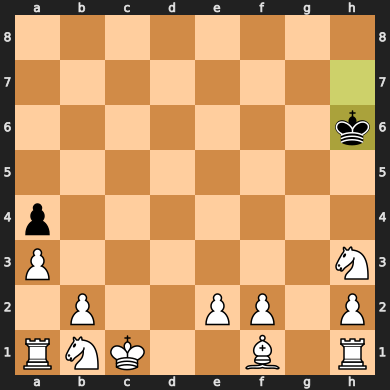

Evaluation: 1.968452488654293e-05


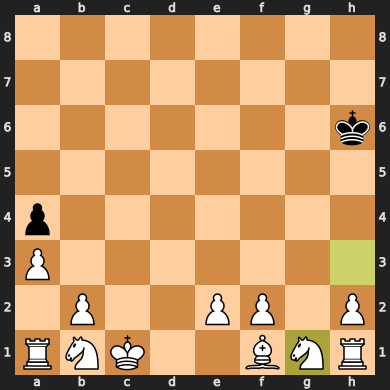

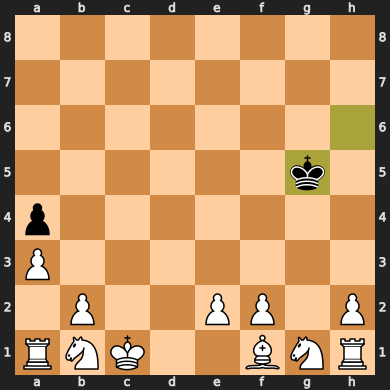

Evaluation: 1.3666162885783706e-05


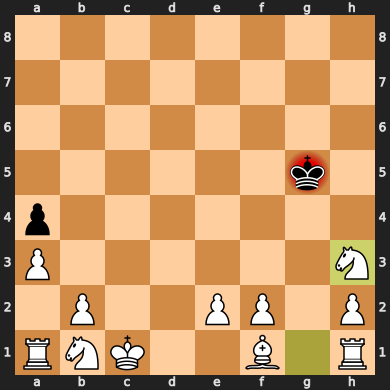

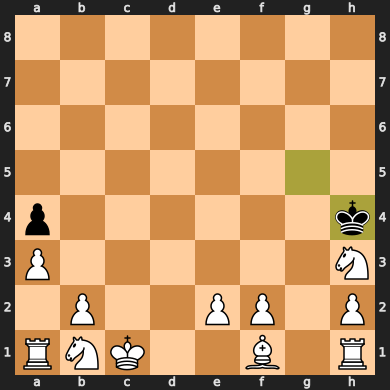

Evaluation: 2.20470847125398e-05


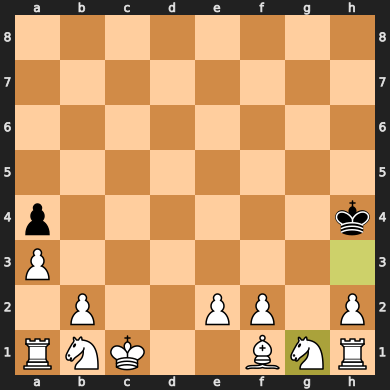

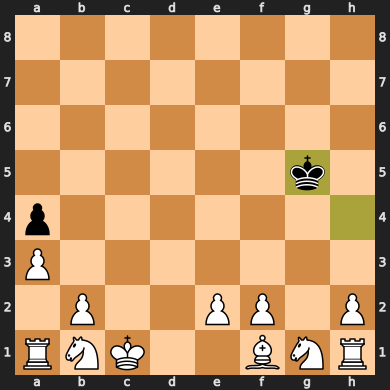

KeyboardInterrupt: 

In [11]:
model_evaluator(1)